In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os, sys, h5py
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import tensorflow as tf
import scipy

import sys
sys.path.append('../../../..')
import mutagenesisfunctions as mf
from deepomics import neuralnetwork as nn
from deepomics import utils, fit, visualize, saliency
#from Bio import AlignIO
import time as time
import pandas as pd
import bpdev as bd

In [2]:
def pkhp_SS(structure = 'simple'):
    if structure == 'simple':
        SShp = '.'*5 +'('*5 + '.'*7 +  ')'*5 + '.'*5 + '.'*5 +'('*5 + '.'*7 +  ')'*5 + '.'*5
        SSpk = '.'*12 +'('*3 + '.'*24 +  ')'*3 + '.'*12
    ugSS = [SShp, SSpk]
    numbp = len(bd.bp_coords(ugSS))
    numug = len(ugSS[0])
    bpugSQ = [str(i) for i in range(numug)]
    
    return (ugSS, numbp, numug, bpugSQ)

ugSS = pkhp_SS()
dims = 4
numbp = len(bd.bp_coords(ugSS))
numug = len(ugSS[0])
bpugSQ = [str(i) for i in range(numug)]


In [21]:
mlpd6 = []
for f in os.listdir('Arrays'):
    if 'mlp_pkhp_d6' in f:
        mlpd6.append(f)
        
np.sort(mlpd6)

array(['toypk_mlp_pkhp_d6_pretran_so0k.npy',
       'toypk_mlp_pkhp_d6t1.4_so0k.npy', 'toypk_mlp_pkhp_d6t1.5_so0k.npy',
       'toypk_mlp_pkhp_d6t1.6_so0k.npy',
       'toypk_mlp_pkhp_d6t1.6e1000_so0k.npy',
       'toypk_mlp_pkhp_d6t1.7e2000_so0k.npy',
       'toypk_mlp_pkhp_d6t1_so0k.npy', 'toypk_mlp_pkhp_d6t2_so0k.npy',
       'toypk_mlp_pkhp_d6t4_so0k.npy',
       'toypk_mlp_pkhp_d6t5.1e1000_so0k.npy',
       'toypk_mlp_pkhp_d6t5_so0k.npy',
       'toypk_mlp_pkhp_d6t6.1e1000_so0k.npy',
       'toypk_mlp_pkhp_d6t6_so0k.npy', 'toypk_mlp_pkhp_d6t7_so0k.npy',
       'toypk_mlp_pkhp_d6t7e2000_so0k.npy'], dtype='|S35')

In [27]:
mlp_ppvs = []
for f in mlpd6:
    savefile = os.path.join('Arrays', f)
    C = bd.get_wc(savefile, numug, dims, bpugSQ, plotit=False)
    p = bd.bp_ppv(C, ugSS, numbp, numug)
    mlp_ppvs.append(p)

In [35]:
mlp_ppvs

[1.0,
 0.6153846153846154,
 1.0,
 0.7692307692307693,
 1.0,
 0.46153846153846156,
 0.7692307692307693,
 0.07692307692307693,
 0.7692307692307693,
 0.7692307692307693,
 1.0,
 0.0,
 1.0,
 1.0,
 0.46153846153846156]

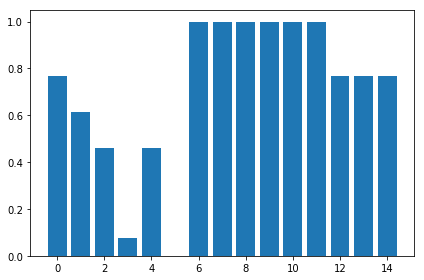

In [39]:
idx =np.argsort(mlpd6)
plt.figure()
plt.bar(range(len(mlp_ppvs)), np.asarray(mlp_ppvs)[idx])
plt.show()

In [31]:
idx

array([ 9,  1,  5,  7, 14, 11,  4,  2, 13,  0, 12, 10,  3,  8,  6])

/home/peter/anaconda2/envs/tensorflow/lib/python2.7/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


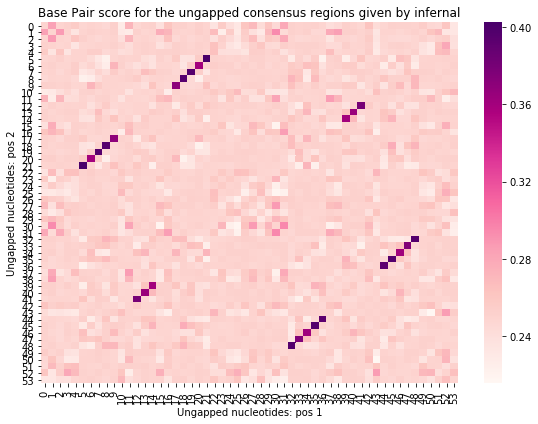

In [3]:
savefile = 'Arrays/toypk_mlp_pkhp_d5t1_so0k.npy'
C = bd.get_wc(savefile, numug, dims, bpugSQ)

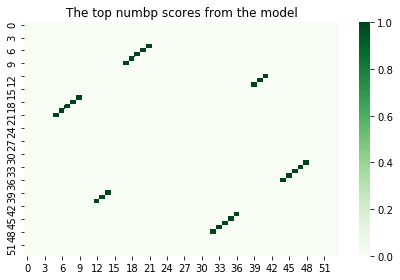

In [4]:
bd.plot_wcrank(C, numug, numbp, cmap='Greens')

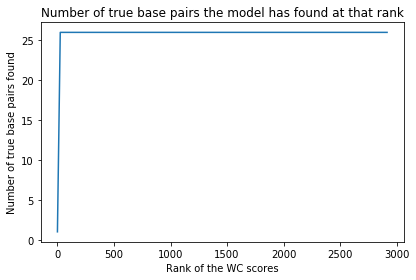

In [6]:
bd.plot_rankprogress(C, ugSS, numbp, numug)

In [7]:
bd.bp_ppv(C, ugSS, numbp, numug)

1.0